# Coursera Capstone

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import folium # map
import requests
plt.style.use('ggplot')
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values 

### Checking Restaurant Number per 100,000 Population 

#### Loading  data from csv file

In [2]:
 # Loading data
rest= pd.read_csv('Number_of_restaurants_per_100,000_population_23062020.csv')

In [3]:
#Checking head
rest.head()

,City,Figure,Per capita,Date,Source,Notes
0,Amsterdam,53.4,NaN,2013,Trade Association for Horeca and Catering,NaN
1,Austin,207.2,NaN,2018,Restaurant Guide - Austin Chronicle,NaN
2,Bogotá,418.6,NaN,2017,Cámara de Comercio de Bogotá,NaN
3,Brasília,8.2,NaN,2019,City of Brasilia,NaN
4,Brussels,360.4,NaN,2013,FOD Economie ADSEI,NaN


In [4]:
rest.shape

(35, 6)

In [5]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        35 non-null     object 
 1   Figure      35 non-null     object 
 2   Per capita  0 non-null      float64
 3   Date        35 non-null     int64  
 4   Source      35 non-null     object 
 5   Notes       5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ KB


In [6]:
rest.City.head()

0    Amsterdam
1       Austin
2       Bogotá
3     Brasília
4     Brussels
Name: City, dtype: object

In [7]:
# Checking values of Figure column
rest['Figure'].value_counts()

848.2      1
27.7       1
400.4      1
477.0      1
221.3      1
201.1      1
366.6      1
272.5      1
360.4      1
207.2      1
418.6      1
7.9        1
95.2       1
457.4      1
53.4       1
24.5       1
212.0      1
100.6      1
132.4      1
200.1      1
128.5      1
1,256.0    1
307.6      1
290.8      1
23.3       1
309.6      1
24.8       1
8.2        1
59.4       1
1,099.5    1
32.0       1
108.3      1
636.2      1
503.7      1
200.3      1
Name: Figure, dtype: int64

_Figure Column is object. let's convert it into float in order to visualize_

In [8]:
rest['Figure'] = rest['Figure'].str.replace(',','') #Removing ',' before converting that column into float
rest['Figure'] = rest['Figure'].astype(float) # Converting Figure column into float

In [9]:
rest.sort_values('Figure',ascending=False,inplace=True) # Sorting dataframe by Figure column

_Visualizing figures by cities_

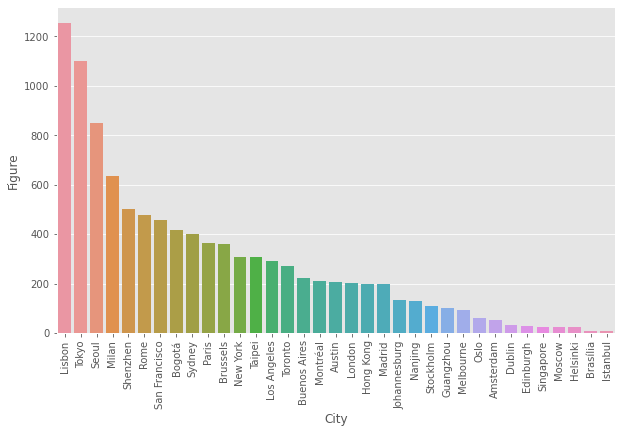

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=rest.City, y=rest.Figure)
plt.xticks(rotation=90);

## Extracting London District Data

In [11]:
# Loading data
london= pd.read_html('https://en.wikipedia.org/wiki/List_of_areas_of_London')

In [12]:
# Cheking type of output
type(london) 

list

In [13]:
# Second element in list
london[1] 

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
530,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


In [14]:
# Assigning table to a variable
london_dist= london[1] 

In [15]:
# Checking shape
london_dist.shape 

(532, 6)

In [16]:
# Checking info
london_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Location           532 non-null    object
 1   London borough     532 non-null    object
 2   Post town          532 non-null    object
 3   Postcode district  532 non-null    object
 4   Dial code          532 non-null    object
 5   OS grid ref        530 non-null    object
dtypes: object(6)
memory usage: 25.1+ KB


In [17]:
# Keeping only required columns
london_dist = london_dist.iloc[:,[0]+[1]+[3]]

In [18]:
london_dist.head()

,Location,London borough,Postcode district
0,Abbey Wood,"Bexley, Greenwich [7]",SE2
1,Acton,"Ealing, Hammersmith and Fulham[8]","W3, W4"
2,Addington,Croydon[8],CR0
3,Addiscombe,Croydon[8],CR0
4,Albany Park,Bexley,"DA5, DA14"


In [19]:
# Fixing column names
london_dist.columns=['Location','Borough','PostalCode']

In [20]:
london_dist.head()

,Location,Borough,PostalCode
0,Abbey Wood,"Bexley, Greenwich [7]",SE2
1,Acton,"Ealing, Hammersmith and Fulham[8]","W3, W4"
2,Addington,Croydon[8],CR0
3,Addiscombe,Croydon[8],CR0
4,Albany Park,Bexley,"DA5, DA14"


In [21]:
london_dist.shape

(532, 3)

### Selecting only central London districts, with postal codes WC1, WC2, EC1 and EC4

In [22]:
searchfor = ['WC1', 'WC2','EC1', 'EC4'] # Selecting target district postal codes
london_cent = london_dist[london_dist['PostalCode'].str.contains('|'.join(searchfor))] # Assigning output to a new dataframe

In [23]:
# Checking dataframe
london_cent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 7 to 456
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    16 non-null     object
 1   Borough     16 non-null     object
 2   PostalCode  16 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [24]:
# Dropping Borough column, reindexing
london_cent= london_cent.drop(columns='Borough', axis=1)

In [25]:
london_cent.reset_index(drop=True, inplace=True)

In [26]:
london_cent

,Location,PostalCode
0,Aldwych,WC2
1,Angel,"EC1, N1"
2,Barbican,"EC1, EC2"
3,Blackfriars,EC4
4,Bloomsbury,WC1
5,Charing Cross,WC2
6,Clerkenwell,EC1
7,Covent Garden,WC2
8,Farringdon,EC1
9,Finsbury,EC1


### Adding Coordinates to DataFrame

In [27]:
# For loop for the coordinates
coor_dict={'Latitude':[],'Longitude':[]} # Creating an empty dictionary
geolocator = Nominatim(user_agent="ny_explorer") # Initializing geolocator

for i in range(len(london_cent)): # Range of row number in dataframe
    location = geolocator.geocode('{},{}'.format(london_cent['Location'][i], 'London')) # Entering Location name as an adress
    coor_dict['Latitude'].append(location.latitude) # Adding latitute to dictionary
    coor_dict['Longitude'].append(location.longitude) # Adding longitude to dictionary

In [28]:
coor_dict

{'Latitude': [51.5132812,
  51.5318417,
  51.5201501,
  51.5115854,
  51.523126,
  51.5074975,
  51.5237268,
  51.512873600000006,
  51.5201241,
  51.521798,
  51.5179341,
  51.5323954,
  51.5154723,
  51.489577,
  51.5259149,
  51.5109659],
 'Longitude': [-0.1160301,
  -0.1057137,
  -0.0986832,
  -0.1037671,
  -0.1260664,
  -0.1236888,
  -0.1055555,
  -0.12254367918576929,
  -0.1047928,
  -0.0914245,
  -0.1195284,
  -0.1230224,
  -0.1284181,
  -0.16938725233160384,
  -0.1290973,
  -0.1143345]}

In [29]:
# From dictionary to dataframe
pd.DataFrame(coor_dict).head()

,Latitude,Longitude
0,51.513281,-0.116030
1,51.531842,-0.105714
2,51.520150,-0.098683
3,51.511585,-0.103767
4,51.523126,-0.126066


In [30]:
# Adding dictionary to dataframe as new columns, assigning as df3
london_cent_coor = pd.concat([london_cent,pd.DataFrame(coor_dict)], axis=1)

In [31]:
london_cent_coor.head()

,Location,PostalCode,Latitude,Longitude
0,Aldwych,WC2,51.513281,-0.116030
1,Angel,"EC1, N1",51.531842,-0.105714
2,Barbican,"EC1, EC2",51.520150,-0.098683
3,Blackfriars,EC4,51.511585,-0.103767
4,Bloomsbury,WC1,51.523126,-0.126066


_Target district dataframe with coordinates is ready._

### Map of London with Location and Postal Code markers

In [34]:
# Checking coordinates of Toronto
address = 'London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [35]:
# create map of Toronto using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, location,PostalCode in zip(london_cent_coor['Latitude'], london_cent_coor['Longitude'], london_cent_coor['Location'],london_cent_coor['PostalCode']):
    label = '{}, {}'.format(location,PostalCode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
map_london

### Explore Target Locations in London Using Foursquare API

In [36]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [37]:
# define Foursquare Credentials and Version
CLIENT_ID = 'PMAZFKEO2ZSMXR1QU3VJOQLPVAG1QQG0OZ0MR3RYJPRUBQCS' # your Foursquare ID
CLIENT_SECRET = 'CXU2UCKAXEUC2JJX1PBBQYGWWFKAR5NCVC30QDTQ1VIGTQSC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PMAZFKEO2ZSMXR1QU3VJOQLPVAG1QQG0OZ0MR3RYJPRUBQCS
CLIENT_SECRET:CXU2UCKAXEUC2JJX1PBBQYGWWFKAR5NCVC30QDTQ1VIGTQSC


#### Getting the top 100 venues in target locations within a radius of 500 meters.

In [38]:
radius = 500
LIMIT = 100

venues = []

for lat, lng, location,PostalCode in zip(london_cent_coor['Latitude'], london_cent_coor['Longitude'], london_cent_coor['Location'],london_cent_coor['PostalCode']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            location, 
            PostalCode,
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [39]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Location', 'PostalCode', 'LocationLatitude', 'LocationLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1218, 8)


,Location,PostalCode,LocationLatitude,LocationLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Aldwych,WC2,51.513281,-0.11603,The Delaunay,51.513181,-0.117988,Restaurant
1,Aldwych,WC2,51.513281,-0.11603,The Courtauld Gallery,51.511584,-0.117559,Art Museum
2,Aldwych,WC2,51.513281,-0.11603,Temple Brew House,51.512940,-0.113029,Pub
3,Aldwych,WC2,51.513281,-0.11603,Aldwych Theatre,51.513053,-0.118993,Theater
4,Aldwych,WC2,51.513281,-0.11603,180 The Strand,51.512671,-0.115009,Art Gallery


In [40]:
# Checking how many venues were returned for each location
venues_df.groupby("Location").count()

,PostalCode,LocationLatitude,LocationLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Location,,,,,,,
Aldwych,100,100,100,100,100,100,100
Angel,65,65,65,65,65,65,65
Barbican,62,62,62,62,62,62,62
Blackfriars,71,71,71,71,71,71,71
Bloomsbury,62,62,62,62,62,62,62
Charing Cross,78,78,78,78,78,78,78
Clerkenwell,100,100,100,100,100,100,100
Covent Garden,100,100,100,100,100,100,100
Farringdon,53,53,53,53,53,53,53


In [41]:
# See how many unique categories can be created from all values
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 197 uniques categories.


In [42]:
venues_df['VenueCategory'].value_counts()

Coffee Shop              82
Pub                      73
Hotel                    63
Café                     45
Theater                  43
                         ..
Wings Joint               1
Yoshoku Restaurant        1
Distillery                1
Film Studio               1
General Entertainment     1
Name: VenueCategory, Length: 197, dtype: int64

In [43]:
# print out the list of categories
venues_df['VenueCategory'].unique()#[:50]

array(['Restaurant', 'Art Museum', 'Pub', 'Theater', 'Art Gallery',
       'Coffee Shop', 'French Restaurant', 'Historic Site', 'Tea Room',
       'Hotel', 'Event Space', 'Hotel Bar', 'Park', 'History Museum',
       'Cocktail Bar', 'Wine Bar', 'Japanese Restaurant', 'Wine Shop',
       'Lebanese Restaurant', 'American Restaurant', 'Korean Restaurant',
       'Argentinian Restaurant', 'Brasserie', 'Burger Joint',
       'Opera House', 'Sandwich Place', 'Museum', 'Dance Studio',
       'Bakery', 'Building', 'Sushi Restaurant', 'Gym / Fitness Center',
       'Tapas Restaurant', 'Dessert Shop', 'Deli / Bodega', 'Gift Shop',
       'Boutique', 'Garden', 'Shopping Plaza', 'Boat or Ferry',
       'Gelato Shop', 'English Restaurant', 'Bookstore', 'Ice Cream Shop',
       'Bar', 'Cosmetics Shop', 'Indian Restaurant', 'Beer Bar',
       'Seafood Restaurant', 'Paper / Office Supplies Store',
       'Vegetarian / Vegan Restaurant', 'Cupcake Shop', 'Fish Market',
       'Food Truck', 'Nightclub', 

### Analyzing Each Location

In [44]:
venues_df.sample(10)

,Location,PostalCode,LocationLatitude,LocationLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
781,Holborn,"WC1, WC2",51.517934,-0.119528,Zip Bab,51.519764,-0.117441,Korean Restaurant
1049,St Luke's,EC1,51.489577,-0.169387,Chloe's Nail Spa,51.490056,-0.163067,Spa
688,Farringdon,EC1,51.520124,-0.104793,Terroni of Clerkenwell,51.522020,-0.109356,Deli / Bodega
499,Clerkenwell,EC1,51.523727,-0.105555,Carnivore,51.521400,-0.109908,BBQ Joint
551,Covent Garden,WC2,51.512874,-0.122544,Jubilee Hall Gym,51.511956,-0.122108,Gym / Fitness Center
948,St Giles,WC2,51.515472,-0.128418,eat TOKYO,51.513636,-0.130193,Sushi Restaurant
936,St Giles,WC2,51.515472,-0.128418,Seven Dials Market,51.513907,-0.125924,Food Court
844,King's Cross,WC1,51.532395,-0.123022,Ekachai,51.533893,-0.122262,Asian Restaurant
1057,St Pancras,WC1,51.525915,-0.129097,Tavistock Square,51.525006,-0.129068,Park
376,Charing Cross,WC2,51.507497,-0.123689,Superdrug,51.509174,-0.124054,Pharmacy


In [45]:
# one hot encoding
london_onehot = pd.get_dummies(venues_df['VenueCategory'])

# add Location and PostalCode column back to dataframe
london_onehot['Location'] = venues_df['Location'] 
london_onehot['PostalCode'] = venues_df['PostalCode'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = (london_onehot.columns[-2:]).tolist() + (london_onehot.columns[:-2]).tolist()
london_onehot = london_onehot[fixed_columns]

print(london_onehot.shape)
london_onehot.head()

(1218, 199)


,Location,PostalCode,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant
0,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aldwych,WC2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aldwych,WC2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by location and by taking the mean of the frequency of occurrence of each category

In [46]:
london_grouped = london_onehot.groupby(["Location", "PostalCode"]).mean().reset_index()

print(london_grouped.shape)
london_grouped

(16, 199)


,Location,PostalCode,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant
0,Aldwych,WC2,0.00,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.00,0.000000,0.000000,0.00
1,Angel,"EC1, N1",0.00,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030769,0.000000,0.030769,0.000000,0.000000,0.015385,0.00,0.000000,0.015385,0.00
2,Barbican,"EC1, EC2",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,...,0.000000,0.000000,0.016129,0.000000,0.032258,0.000000,0.00,0.000000,0.000000,0.00
3,Blackfriars,EC4,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,...,0.000000,0.000000,0.014085,0.000000,0.042254,0.000000,0.00,0.000000,0.000000,0.00
4,Bloomsbury,WC1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
5,Charing Cross,WC2,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,...,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.00,0.000000,0.000000,0.00
6,Clerkenwell,EC1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.030000,0.010000,0.010000,0.010000,0.00,0.000000,0.000000,0.00
7,Covent Garden,WC2,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.000000,0.00
8,Farringdon,EC1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.018868,0.018868,0.056604,0.000000,0.00,0.000000,0.000000,0.00
9,Finsbury,EC1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,...,0.000000,0.000000,0.028169,0.014085,0.000000,0.000000,0.00,0.000000,0.000000,0.00


#### Now let's create the new dataframe and display the top 10 venues for each Location

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ["Location", "PostalCode"]
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = london_grouped['Location']
location_venues_sorted['PostalCode'] = london_grouped['PostalCode']

for ind in np.arange(london_grouped.shape[0]):
    row_categories = london_grouped.iloc[ind, :].iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    location_venues_sorted.iloc[ind, 2:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(location_venues_sorted.shape)
location_venues_sorted

(16, 12)


,Location,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldwych,WC2,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
1,Angel,"EC1, N1",Pub,Coffee Shop,Hotel,Café,Vegetarian / Vegan Restaurant,Food Truck,Gym / Fitness Center,Restaurant,Mediterranean Restaurant,Vietnamese Restaurant
2,Barbican,"EC1, EC2",Hotel,Coffee Shop,Café,French Restaurant,Pub,Italian Restaurant,Park,Cocktail Bar,Beer Bar,Sandwich Place
3,Blackfriars,EC4,Pub,Coffee Shop,Italian Restaurant,Cocktail Bar,Sandwich Place,Hotel,Gym / Fitness Center,Wine Bar,Bakery,Falafel Restaurant
4,Bloomsbury,WC1,Coffee Shop,Café,Hotel,Bookstore,Pub,Garden,Exhibit,History Museum,Plaza,Park
5,Charing Cross,WC2,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
6,Clerkenwell,EC1,Pub,Coffee Shop,Café,Bar,Hotel,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Vietnamese Restaurant
7,Covent Garden,WC2,Theater,Coffee Shop,Burger Joint,Hotel,Ice Cream Shop,Bakery,Steakhouse,Restaurant,Clothing Store,Café
8,Farringdon,EC1,Coffee Shop,Pub,Hotel,Wine Bar,Beer Bar,Food Truck,Falafel Restaurant,Burrito Place,Gym / Fitness Center,French Restaurant
9,Finsbury,EC1,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Food Truck,Hotel,Bar,Café,Turkish Restaurant,Deli / Bodega,Bagel Shop


#### Cluster Neighborhoods

In [48]:
# Importing Kmeans from sklearn
from sklearn.cluster import KMeans

In [49]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop(["Location", "PostalCode"], axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 2, 1, 2, 4, 1, 4, 1, 2])

In [50]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
london_merged = london_cent_coor.copy()

# add clustering labels
london_merged["Cluster Labels"] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(location_venues_sorted.drop(["Location"], 1).set_index("PostalCode"), on="PostalCode")

print(london_merged.shape)
london_merged.head() # check the last columns!

(46, 15)


,Location,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldwych,WC2,51.513281,-0.116030,0,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
0,Aldwych,WC2,51.513281,-0.116030,0,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
0,Aldwych,WC2,51.513281,-0.116030,0,Theater,Coffee Shop,Burger Joint,Hotel,Ice Cream Shop,Bakery,Steakhouse,Restaurant,Clothing Store,Café
0,Aldwych,WC2,51.513281,-0.116030,0,Coffee Shop,Theater,Cocktail Bar,Italian Restaurant,Steakhouse,Hotel,Lounge,Burger Joint,Bookstore,Bakery
1,Angel,"EC1, N1",51.531842,-0.105714,1,Pub,Coffee Shop,Hotel,Café,Vegetarian / Vegan Restaurant,Food Truck,Gym / Fitness Center,Restaurant,Mediterranean Restaurant,Vietnamese Restaurant


In [51]:
# sort the results by Cluster Labels
print(london_merged.shape)
london_merged.sort_values(["Cluster Labels"], inplace=True)
london_merged.head()

(46, 15)


,Location,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldwych,WC2,51.513281,-0.116030,0,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
0,Aldwych,WC2,51.513281,-0.116030,0,Coffee Shop,Theater,Cocktail Bar,Italian Restaurant,Steakhouse,Hotel,Lounge,Burger Joint,Bookstore,Bakery
15,Temple,"EC4, WC2",51.510966,-0.114335,0,Theater,Hotel,Pub,Coffee Shop,Scenic Lookout,Cocktail Bar,Building,Bookstore,Tea Room,Hotel Bar
0,Aldwych,WC2,51.513281,-0.116030,0,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
0,Aldwych,WC2,51.513281,-0.116030,0,Theater,Coffee Shop,Burger Joint,Hotel,Ice Cream Shop,Bakery,Steakhouse,Restaurant,Clothing Store,Café


In [52]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [53]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, loc, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['PostalCode'], london_merged['Location'], london_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): - Cluster {}'.format(loc, post, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 0

In [54]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0]+(np.arange(4, london_merged.shape[1])).tolist()]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldwych,0,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
0,Aldwych,0,Coffee Shop,Theater,Cocktail Bar,Italian Restaurant,Steakhouse,Hotel,Lounge,Burger Joint,Bookstore,Bakery
15,Temple,0,Theater,Hotel,Pub,Coffee Shop,Scenic Lookout,Cocktail Bar,Building,Bookstore,Tea Room,Hotel Bar
0,Aldwych,0,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
0,Aldwych,0,Theater,Coffee Shop,Burger Joint,Hotel,Ice Cream Shop,Bakery,Steakhouse,Restaurant,Clothing Store,Café


In [55]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0]+(np.arange(4, london_merged.shape[1])).tolist()]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Farringdon,1,Bakery,Italian Restaurant,Gym / Fitness Center,Japanese Restaurant,Ice Cream Shop,Spa,Café,English Restaurant,Coffee Shop,French Restaurant
8,Farringdon,1,Coffee Shop,Pub,Hotel,Wine Bar,Beer Bar,Food Truck,Falafel Restaurant,Burrito Place,Gym / Fitness Center,French Restaurant
6,Clerkenwell,1,Bakery,Italian Restaurant,Gym / Fitness Center,Japanese Restaurant,Ice Cream Shop,Spa,Café,English Restaurant,Coffee Shop,French Restaurant
6,Clerkenwell,1,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Food Truck,Hotel,Bar,Café,Turkish Restaurant,Deli / Bodega,Bagel Shop
6,Clerkenwell,1,Coffee Shop,Pub,Hotel,Wine Bar,Beer Bar,Food Truck,Falafel Restaurant,Burrito Place,Gym / Fitness Center,French Restaurant
6,Clerkenwell,1,Pub,Coffee Shop,Café,Bar,Hotel,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Vietnamese Restaurant
8,Farringdon,1,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Food Truck,Hotel,Bar,Café,Turkish Restaurant,Deli / Bodega,Bagel Shop
8,Farringdon,1,Pub,Coffee Shop,Café,Bar,Hotel,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Vietnamese Restaurant
1,Angel,1,Pub,Coffee Shop,Hotel,Café,Vegetarian / Vegan Restaurant,Food Truck,Gym / Fitness Center,Restaurant,Mediterranean Restaurant,Vietnamese Restaurant
3,Blackfriars,1,Pub,Coffee Shop,Italian Restaurant,Cocktail Bar,Sandwich Place,Hotel,Gym / Fitness Center,Wine Bar,Bakery,Falafel Restaurant


In [56]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0]+(np.arange(4, london_merged.shape[1])).tolist()]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,St Pancras,2,Coffee Shop,Café,Hotel,Train Station,Burger Joint,Bar,Pizza Place,Breakfast Spot,Speakeasy,Museum
14,St Pancras,2,Coffee Shop,Café,Hotel,Bookstore,Pub,Garden,Exhibit,History Museum,Plaza,Park
11,King's Cross,2,Coffee Shop,Café,Hotel,Pub,Bookstore,Sushi Restaurant,Sandwich Place,Bar,Italian Restaurant,Bakery
11,King's Cross,2,Coffee Shop,Café,Hotel,Train Station,Burger Joint,Bar,Pizza Place,Breakfast Spot,Speakeasy,Museum
11,King's Cross,2,Coffee Shop,Café,Hotel,Bookstore,Pub,Garden,Exhibit,History Museum,Plaza,Park
10,Holborn,2,Pub,Sandwich Place,Chinese Restaurant,Bookstore,Hotel,Café,Coffee Shop,History Museum,Garden,Bakery
9,Finsbury,2,Bakery,Italian Restaurant,Gym / Fitness Center,Japanese Restaurant,Ice Cream Shop,Spa,Café,English Restaurant,Coffee Shop,French Restaurant
9,Finsbury,2,Coffee Shop,Pub,Hotel,Wine Bar,Beer Bar,Food Truck,Falafel Restaurant,Burrito Place,Gym / Fitness Center,French Restaurant
9,Finsbury,2,Pub,Coffee Shop,Café,Bar,Hotel,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Vietnamese Restaurant
9,Finsbury,2,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Food Truck,Hotel,Bar,Café,Turkish Restaurant,Deli / Bodega,Bagel Shop


In [57]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0]+(np.arange(4, london_merged.shape[1])).tolist()]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,St Luke's,3,Bakery,Italian Restaurant,Gym / Fitness Center,Japanese Restaurant,Ice Cream Shop,Spa,Café,English Restaurant,Coffee Shop,French Restaurant
13,St Luke's,3,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Food Truck,Hotel,Bar,Café,Turkish Restaurant,Deli / Bodega,Bagel Shop
13,St Luke's,3,Coffee Shop,Pub,Hotel,Wine Bar,Beer Bar,Food Truck,Falafel Restaurant,Burrito Place,Gym / Fitness Center,French Restaurant
13,St Luke's,3,Pub,Coffee Shop,Café,Bar,Hotel,Pizza Place,Italian Restaurant,Gym / Fitness Center,French Restaurant,Vietnamese Restaurant


In [58]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0]+(np.arange(4, london_merged.shape[1])).tolist()]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Charing Cross,4,Coffee Shop,Theater,Cocktail Bar,Italian Restaurant,Steakhouse,Hotel,Lounge,Burger Joint,Bookstore,Bakery
5,Charing Cross,4,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
12,St Giles,4,Coffee Shop,Theater,Cocktail Bar,Italian Restaurant,Steakhouse,Hotel,Lounge,Burger Joint,Bookstore,Bakery
12,St Giles,4,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
12,St Giles,4,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
7,Covent Garden,4,Pub,Theater,Hotel,Restaurant,Coffee Shop,Burger Joint,Building,Sandwich Place,Tea Room,Japanese Restaurant
7,Covent Garden,4,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
5,Charing Cross,4,Theater,Burger Joint,Restaurant,Ice Cream Shop,Coffee Shop,Pub,Hotel,Bakery,Monument / Landmark,Plaza
7,Covent Garden,4,Theater,Coffee Shop,Burger Joint,Hotel,Ice Cream Shop,Bakery,Steakhouse,Restaurant,Clothing Store,Café
7,Covent Garden,4,Coffee Shop,Theater,Cocktail Bar,Italian Restaurant,Steakhouse,Hotel,Lounge,Burger Joint,Bookstore,Bakery


## Analyzing Locations in terms of Restaurants only

### Selecting only restaurants, food related venues

In [65]:
# print out the list of categories
print(list(venues_df['VenueCategory'].unique()))

['Restaurant', 'Art Museum', 'Pub', 'Theater', 'Art Gallery', 'Coffee Shop', 'French Restaurant', 'Historic Site', 'Tea Room', 'Hotel', 'Event Space', 'Hotel Bar', 'Park', 'History Museum', 'Cocktail Bar', 'Wine Bar', 'Japanese Restaurant', 'Wine Shop', 'Lebanese Restaurant', 'American Restaurant', 'Korean Restaurant', 'Argentinian Restaurant', 'Brasserie', 'Burger Joint', 'Opera House', 'Sandwich Place', 'Museum', 'Dance Studio', 'Bakery', 'Building', 'Sushi Restaurant', 'Gym / Fitness Center', 'Tapas Restaurant', 'Dessert Shop', 'Deli / Bodega', 'Gift Shop', 'Boutique', 'Garden', 'Shopping Plaza', 'Boat or Ferry', 'Gelato Shop', 'English Restaurant', 'Bookstore', 'Ice Cream Shop', 'Bar', 'Cosmetics Shop', 'Indian Restaurant', 'Beer Bar', 'Seafood Restaurant', 'Paper / Office Supplies Store', 'Vegetarian / Vegan Restaurant', 'Cupcake Shop', 'Fish Market', 'Food Truck', 'Nightclub', 'Arts & Crafts Store', 'Cheese Shop', 'Street Food Gathering', 'Turkish Restaurant', 'Café', 'Burrito Pl

#### Creating a new list from venue category list that contains Restaurant, Food, Wings, Salad

In [104]:
venues_rest = []
venues_rest = [item for item in list(venues_df['VenueCategory'].unique()) if any([('Restaurant' in item)
                                                                                  | ('Food' in item)
                                                                                  | ('Wings' in item)
                                                                                  | ('Salad' in item)]) ]

In [107]:
# New venue list consisting of only restaurants and diners
print(venues_rest)

['Restaurant', 'French Restaurant', 'Japanese Restaurant', 'Lebanese Restaurant', 'American Restaurant', 'Korean Restaurant', 'Argentinian Restaurant', 'Sushi Restaurant', 'Tapas Restaurant', 'English Restaurant', 'Indian Restaurant', 'Seafood Restaurant', 'Vegetarian / Vegan Restaurant', 'Food Truck', 'Street Food Gathering', 'Turkish Restaurant', 'Mediterranean Restaurant', 'Austrian Restaurant', 'Afghan Restaurant', 'Vietnamese Restaurant', 'Ramen Restaurant', 'Hunan Restaurant', 'Caucasian Restaurant', 'Mexican Restaurant', 'Modern European Restaurant', 'Italian Restaurant', 'Moroccan Restaurant', 'Spanish Restaurant', 'Falafel Restaurant', 'South American Restaurant', 'Salad Place', 'Chinese Restaurant', 'Szechuan Restaurant', 'North Indian Restaurant', 'Portuguese Restaurant', 'Asian Restaurant', 'Thai Restaurant', 'Pakistani Restaurant', 'Middle Eastern Restaurant', 'Gluten-free Restaurant', 'Food Court', 'Japanese Curry Restaurant', 'Food & Drink Shop', 'Malay Restaurant', 'Rus

In [109]:
# See how many categories 
len(venues_rest)

57

In [124]:
london_grouped_rest = london_grouped[['Location']+venues_rest]

In [125]:
london_grouped_rest

,Location,Restaurant,French Restaurant,Japanese Restaurant,Lebanese Restaurant,American Restaurant,Korean Restaurant,Argentinian Restaurant,Sushi Restaurant,Tapas Restaurant,...,Sri Lankan Restaurant,Cantonese Restaurant,Yoshoku Restaurant,Udon Restaurant,Scandinavian Restaurant,Wings Joint,Greek Restaurant,Health Food Store,New American Restaurant,Himalayan Restaurant
0,Aldwych,0.060000,0.020000,0.020000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Angel,0.030769,0.015385,0.015385,0.000000,0.000000,0.015385,0.000000,0.015385,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Barbican,0.000000,0.048387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Blackfriars,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Bloomsbury,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Charing Cross,0.051282,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Clerkenwell,0.010000,0.030000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.010000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Covent Garden,0.030000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.020000,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Farringdon,0.018868,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Finsbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Now let's create the new dataframe and display the top 10 venues for each Location

In [128]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ["Location"]
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = london_grouped_rest['Location']


for ind in np.arange(london_grouped_rest.shape[0]):
    row_categories = london_grouped_rest.iloc[ind, :].iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    location_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(location_venues_sorted.shape)
location_venues_sorted

(16, 11)


,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldwych,French Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Indian Restaurant,Tapas Restaurant,English Restaurant,Argentinian Restaurant,Korean Restaurant,American Restaurant
1,Angel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Food Truck,French Restaurant,Mexican Restaurant,Caucasian Restaurant,Hunan Restaurant,Ramen Restaurant,Afghan Restaurant
2,Barbican,French Restaurant,Italian Restaurant,English Restaurant,Moroccan Restaurant,Modern European Restaurant,Vietnamese Restaurant,Spanish Restaurant,Sushi Restaurant,Afghan Restaurant,Japanese Restaurant
3,Blackfriars,Italian Restaurant,Falafel Restaurant,Sushi Restaurant,South American Restaurant,Salad Place,Modern European Restaurant,English Restaurant,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant
4,Bloomsbury,Falafel Restaurant,Turkish Restaurant,Italian Restaurant,Chinese Restaurant,Szechuan Restaurant,Tapas Restaurant,Modern European Restaurant,Mexican Restaurant,Caucasian Restaurant,Hunan Restaurant
5,Charing Cross,French Restaurant,Seafood Restaurant,Spanish Restaurant,Mexican Restaurant,Italian Restaurant,Pakistani Restaurant,Thai Restaurant,Sushi Restaurant,Asian Restaurant,North Indian Restaurant
6,Clerkenwell,French Restaurant,Food Truck,Vietnamese Restaurant,Italian Restaurant,Sushi Restaurant,Spanish Restaurant,Middle Eastern Restaurant,Gluten-free Restaurant,Korean Restaurant,Tapas Restaurant
7,Covent Garden,Sushi Restaurant,Indian Restaurant,Japanese Curry Restaurant,Asian Restaurant,Food Court,Portuguese Restaurant,Mexican Restaurant,English Restaurant,Korean Restaurant,American Restaurant
8,Farringdon,Food Truck,Falafel Restaurant,French Restaurant,Spanish Restaurant,English Restaurant,Modern European Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Street Food Gathering,Moroccan Restaurant
9,Finsbury,Italian Restaurant,Food Truck,Vietnamese Restaurant,Turkish Restaurant,Ramen Restaurant,Sushi Restaurant,Asian Restaurant,Russian Restaurant,Malay Restaurant,Food & Drink Shop


In [129]:
num_top_venues = 5

for hood in london_grouped_rest['Location']:
    print("----"+hood+"----")
    temp = london_grouped_rest[london_grouped_rest['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aldwych----
                 venue  freq
0           Restaurant  0.06
1  Japanese Restaurant  0.02
2    French Restaurant  0.02
3     Sushi Restaurant  0.01
4    Indian Restaurant  0.01


----Angel----
                           venue  freq
0                     Restaurant  0.03
1                     Food Truck  0.03
2          Vietnamese Restaurant  0.03
3       Mediterranean Restaurant  0.03
4  Vegetarian / Vegan Restaurant  0.03


----Barbican----
                        venue  freq
0           French Restaurant  0.05
1          Italian Restaurant  0.03
2          Spanish Restaurant  0.02
3         Moroccan Restaurant  0.02
4  Modern European Restaurant  0.02


----Blackfriars----
                venue  freq
0  Italian Restaurant  0.06
1  Falafel Restaurant  0.03
2    Sushi Restaurant  0.03
3   Indian Restaurant  0.01
4         Salad Place  0.01


----Bloomsbury----
                 venue  freq
0           Restaurant  0.02
1     Tapas Restaurant  0.02
2  Szechuan Restaurant  0.0

In [137]:
london_onehot.head()

,Location,PostalCode,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant
0,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aldwych,WC2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aldwych,WC2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
london_onehot['Total'] = london_onehot.sum(axis=1)
london_onehot.head()

,Location,PostalCode,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Total
0,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Aldwych,WC2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Aldwych,WC2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Aldwych,WC2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


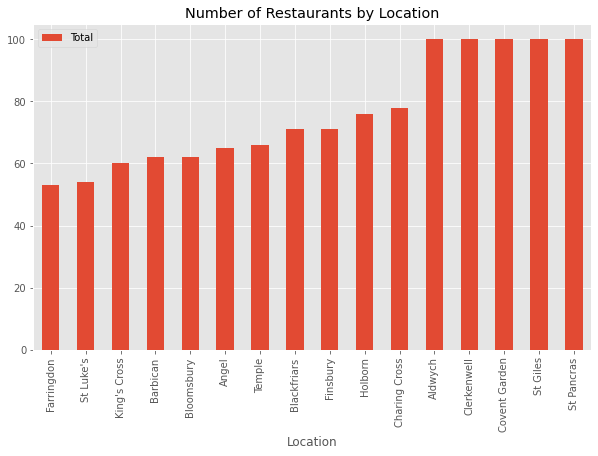

In [161]:

final = london_onehot [['Location','Total']].groupby('Location').sum()

final.sort_values('Total').plot.bar(figsize=(10,6))
plt.title('Number of Restaurants by Location');

### Results and Conclusion

According to number of restaurants for each location, Farringdon, St. Luke's are best places since they have least number of restaurants.   
However Italian, French  and Spanish restaurants are among the most freuquent in those places. Since the investor wants to open a Mediterrenean restaurant, it wouldn't be profitable to start business in a competitive area.  


In [157]:
location_venues_sorted[(location_venues_sorted['Location']=="Farringdon")|(location_venues_sorted['Location']=="St Luke's")]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Farringdon,Food Truck,Falafel Restaurant,French Restaurant,Spanish Restaurant,English Restaurant,Modern European Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Street Food Gathering,Moroccan Restaurant
13,St Luke's,Japanese Restaurant,Italian Restaurant,French Restaurant,English Restaurant,Modern European Restaurant,Argentinian Restaurant,Sushi Restaurant,Asian Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant


Taking into consideration restaurant numbers, Kings' Cross, Barbican, Bloomsbury, Angel and Temple have quite few number of restaurants compared to other location in central London.

In [159]:
location_venues_sorted[(location_venues_sorted['Location']=="King's Cross")
                       |(location_venues_sorted['Location']=="Barbican")
                      |(location_venues_sorted['Location']=="Bloomsbury")
                      |(location_venues_sorted['Location']=="Angel")
                      |(location_venues_sorted['Location']=="Temple")]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Angel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Food Truck,French Restaurant,Mexican Restaurant,Caucasian Restaurant,Hunan Restaurant,Ramen Restaurant,Afghan Restaurant
2,Barbican,French Restaurant,Italian Restaurant,English Restaurant,Moroccan Restaurant,Modern European Restaurant,Vietnamese Restaurant,Spanish Restaurant,Sushi Restaurant,Afghan Restaurant,Japanese Restaurant
4,Bloomsbury,Falafel Restaurant,Turkish Restaurant,Italian Restaurant,Chinese Restaurant,Szechuan Restaurant,Tapas Restaurant,Modern European Restaurant,Mexican Restaurant,Caucasian Restaurant,Hunan Restaurant
11,King's Cross,Modern European Restaurant,Thai Restaurant,Asian Restaurant,Street Food Gathering,Vegetarian / Vegan Restaurant,Indian Restaurant,English Restaurant,Fast Food Restaurant,Sri Lankan Restaurant,Tapas Restaurant
15,Temple,French Restaurant,Japanese Restaurant,Lebanese Restaurant,American Restaurant,Korean Restaurant,Argentinian Restaurant,Mexican Restaurant,Seafood Restaurant,Caucasian Restaurant,Vietnamese Restaurant


Looking at those locations closely, King's Cross is the only location that has no French, Italian, Spanish, Turkish restaurant which are parts of Mediterranean cuisine.  

**As a conclusion, King's Cross would be the best location to start a Mediterranean Restaurant business since it is among the least that has total number of restaurant and doesn't have Mediterranean restaurants in most commons.**


_Note: It's necessary to mention that, before deciding to start a business, other factors should be taken into consideration. That may include demographical factors, taxation, target area visitor statistics etc. Those are out of this project's scope._